# Analysis of COVID impact on US household

<h3> Motivation </h3> 

<p>The goal of this project is to understand the overall impact of COVID on people’s behavior, mental health, housing and livelihoods. There is a large amount of emotionally negative stimuli related to the COVID-19 pandemic. How do people prepare themselves in difficult times like this? Understanding the impact on people is important in order to mitigate the effects and be more prepared in the future. Analyzing and exploring people's response to pandemic can provide useful insights into people's perspective about COVID and the challenges they face.</p>

<h3>Data sources</h3>
<p>The <a href='https://www2.census.gov/programs-surveys/demo/technical-documentation/hhp/2020_HPS_Background.pdf'>Household Pulse Survey</a> provides timely data to help understand the experiences of American households during the coronavirus pandemic. The data provides insights on education, employment, food security, health, housing, social security benefits, household spending, and transportation. Data Collection has been done in 2 phases.</p>
<ul><li>The first phase of the Household Pulse Survey began on April 23 and ended on July 21, 2020.</li>
<li>The second phase of the Household Pulse Survey began on August 19, 2020 and ended on October 26, 2020 </li></ul></p>

<h4> Links to Data set and Data dictionary</h4>
<p>The datasets are available for public use under <a href='https://www.census.gov/programs-surveys/household-pulse-survey/datasets.html'>census.gov</a> website as weekly files. 

<p>Data dictionary is available in the census.gov website under the following links</p>
<li><a href='https://www.census.gov/programs-surveys/household-pulse-survey/technical-documentation.html#phase1'>Phase 1 Household Pulse Survey Technical Documentation</a></li>
<li><a href='https://www.census.gov/programs-surveys/household-pulse-survey/technical-documentation.html#phasePhase2'>Phase 2 Household Pulse Survey Technical Documentation</a></li>

<p>The datasets are very rich and informative. Data is collected through survey and interviews. The dataset has been edited or imputed to fill in missing values in order to mitigate the non-response bias.</p>
    <li><strong>Phase 1</strong> dataset has 105 variables, 1088314 observations and includes employment status, food security, housing, physical and mental health, access to health care, and educational disruption. </li>
     <li><strong>Phase 2</strong> dataset has 188 variables, 413976 observations and includes responses from people on how their domains are changing as the pandemic continues and, application and receipt of benefits, spending patterns, and availability of financial resources, post-secondary education disruptions, capacity to telework, and travel practices. </li>
   <p>In order to support the nation’s recovery, we need to know the ways this pandemic has affected people’s lives and livelihoods. Data from these datasets will show the widespread effects of the coronavirus pandemic on individuals, families, and communities across the country.</p>

<h4>Terms of use of census data </h4>
<p>The Census Bureau is committed to open government by sharing its public data as open data. Census data continues to be a key national resource, serving as a fuel for entrepreneurship and innovation, scientific discovery, and commercial activity.  We continuously identify and publish datasets and Application Programming Interface’s (API’s) to Data.gov in accordance with the Office of Management and Budget (OMB) Memorandum M-10-06, the Executive Order 13642 on open data, and the overall principles outlined in the Digital Government Strategy.  In accordance with the Open Data Policy, M-13-13, the Census Bureau publishes its information in machine-readable formats while also safeguarding privacy and security.</p>


<h3>Research Questions</h3>
<ul>
    <li>Understand the impacts of COVID in terms of Employment loss, income loss, Food insufficiency, Education interuptions, inability to meet housing expenses and how does this vary by Race/Ethnicity or gender? Are minority groups and women affected the most?</li>
    <li>What is the impact on Mental health status (Anxiety and depression) by Age, Household income and race? Is there a correlation between Mental health status (Anxiety and depression) and factors such as age, number of household members, gender, income, health status, race? </li>
    <li>How do these characteristics vary in Washington state? </li>
    <li>How do different groups based on age, race and ethnicity differ in their behavior or attitude towards COVID. Are there any patterns observed in the population based on certain characteristics pertaining to COVID?</li> 
</ul>

<h3>Unknowns and dependencies</h3>
<p>These data are experimental and samples may not be representative of the population. </p>

<h2> Exploratory Data Analysis - WIP </h2>

<h3>Import Packages</h3>

In [45]:
from io import BytesIO
from urllib.request import urlopen
import pandas as pd
from zipfile import ZipFile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas_profiling

<h3>Download data from census.gov</h3>

In [46]:
def getData(df,ver_range):
    for l in ver_range:
        if(l < 10):        
            zipurl = 'https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk'+str(l)+'/HPS_Week0'+str(l)+'_PUF_CSV.zip'
        else:
            zipurl = 'https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk'+str(l)+'/HPS_Week'+str(l)+'_PUF_CSV.zip'
        print("zipurl :",zipurl)
        with urlopen(zipurl) as zipresp:
            with ZipFile(BytesIO(zipresp.read())) as zfile:
                if(l < 10):
                    df1 = pd.read_csv(zfile.open('pulse2020_puf_0'+str(l)+'.csv'))
                else:
                    df1 = pd.read_csv(zfile.open('pulse2020_puf_'+str(l)+'.csv'))
                df1['WEEK'] = l
                df = pd.concat([df,df1], axis=0, ignore_index=True)
    return df

In [47]:
ver_range=np.arange(1,13)
df = pd.DataFrame()
df1 = getData(df,ver_range)

zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk1/HPS_Week01_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk2/HPS_Week02_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk3/HPS_Week03_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk4/HPS_Week04_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk5/HPS_Week05_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk6/HPS_Week06_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk7/HPS_Week07_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk8/HPS_Week08_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk9/HPS_Week09_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk10/HPS_Week10_PUF_CSV.zip

In [48]:
ver_range=np.arange(13,17)
df = pd.DataFrame()
df2 = getData(df,ver_range)

zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk13/HPS_Week13_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk14/HPS_Week14_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk15/HPS_Week15_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk16/HPS_Week16_PUF_CSV.zip


<h3>Get the descriptive statistics, size and shape</h3>

In [49]:
df1.shape

(1088314, 105)

In [50]:
df2.shape

(413976, 188)

In [51]:
df1.head()

SCRAM  WEEK  EST_ST  EST_MSA      PWEIGHT  TBIRTH_YEAR  \
0  V010000001S10011099370111     1      47      NaN  1973.489532         1986   
1  V010000001S10011900470112     1       1      NaN  1929.488419         1955   
2  V010000001S18010744940111     1      26      NaN  1526.612380         1976   
3  V010000001S37010301340112     1       1      NaN  2734.635354         1964   
4  V010000001S37010480340111     1       1      NaN   681.211425         1963   

   ABIRTH_YEAR  EGENDER  AGENDER  RHISPANIC  ...  EIPSPND11  EIPSPND12  \
0            2        2        2          1  ...        NaN        NaN   
1            2        1        2          1  ...        NaN        NaN   
2            2        2        2          1  ...        NaN        NaN   
3            2        1        2          1  ...        NaN        NaN   
4            2        2        2          1  ...        NaN        NaN   

   EIPSPND13  SPNDSRC1  SPNDSRC2  SPNDSRC3  SPNDSRC4  SPNDSRC5  SPNDSRC6  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4        NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   SPNDSRC7  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 105 columns]

In [52]:
df2.head()

SCRAM  WEEK  EST_ST  EST_MSA  REGION      HWEIGHT  \
0  V130000001S12010403200123    13      48  19100.0       2  1276.886650   
1  V130000001S34010154300113    13       1      NaN       2  1195.578846   
2  V130000001S37010241600123    13       1      NaN       2  1124.648326   
3  V130000001S37010645600123    13       1      NaN       2   517.598058   
4  V130000001S70011963510113    13       1      NaN       2   432.646602   

       PWEIGHT  TBIRTH_YEAR  ABIRTH_YEAR  EGENDER  ...  PSWHYCHG1  PSWHYCHG2  \
0  1278.107099         1989            2        1  ...        -88        -88   
1  2323.078960         1988            2        2  ...        -99        -99   
2  1092.628425         1969            2        1  ...        -88        -88   
3  1005.723011         1947            2        1  ...        -88        -88   
4   840.657411         1968            2        2  ...        -88        -88   

   PSWHYCHG3  PSWHYCHG4  PSWHYCHG5  PSWHYCHG6  PSWHYCHG7  PSWHYCHG8  \
0        -88        -88        -88        -88        -88        -88   
1        -99          1          1        -99          1        -99   
2        -88        -88        -88        -88        -88        -88   
3        -88        -88        -88        -88        -88        -88   
4        -88        -88        -88        -88        -88        -88   

   PSWHYCHG9  INCOME  
0        -88       2  
1          1       6  
2        -88       7  
3        -88       6  
4        -88     -88  

[5 rows x 188 columns]

In [53]:
df1_bkp = df1.copy()
df2_bkp = df2.copy()

In [54]:
#df1 = df1_bkp.copy()

In [55]:
#df2 = df2_bkp.copy()

In [56]:
#df1_bkp.head()

In [57]:
#df2_bkp.head()

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Columns: 105 entries, SCRAM to SPNDSRC7
dtypes: float64(27), int32(1), int64(76), object(1)
memory usage: 867.7+ MB


In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413976 entries, 0 to 413975
Columns: 188 entries, SCRAM to INCOME
dtypes: float64(4), int32(1), int64(182), object(1)
memory usage: 592.2+ MB


<h3>Checking for any null values</h3>

In [60]:
df1.isnull().sum()

SCRAM            0
WEEK             0
EST_ST           0
EST_MSA     754900
PWEIGHT          0
             ...  
SPNDSRC3    538953
SPNDSRC4    538953
SPNDSRC5    538953
SPNDSRC6    538953
SPNDSRC7    538953
Length: 105, dtype: int64

In [61]:
df2.isnull().sum()

SCRAM             0
WEEK              0
EST_ST            0
EST_MSA      281849
REGION            0
              ...  
PSWHYCHG6         0
PSWHYCHG7         0
PSWHYCHG8         0
PSWHYCHG9         0
INCOME            0
Length: 188, dtype: int64

<h3>Variables of interest for df1 dataset</h3>

In [62]:
cols_int = ['ABIRTH_YEAR','AEDUC','AGENDER','AHHLD_NUMKID','EST_MSA','AHHLD_NUMPER','AHISPANIC','ANXIOUS','ANYWORK','ARACE','COMP1','COMP2','COMP3','COMPAVAIL','CURFOODSUF','DELAY','DOWN','EEDUC','EGENDER','ENROLL1','ENROLL2','ENROLL3','EST_ST','EXPCTLOSS','FOODCONF','FOODSUFRSN1','FOODSUFRSN2','FOODSUFRSN3','FOODSUFRSN4','FOODSUFRSN5','FREEFOOD','HLTHINS1','HLTHINS2','HLTHINS3','HLTHINS4','HLTHINS5','HLTHINS6','HLTHINS7','HLTHINS8','HLTHSTATUS','INCOME','INTEREST','INTRNT1','INTRNT2','INTRNT3','INTRNTAVAIL','KINDWORK','MORTCONF','MORTLMTH','MS','NOTGET','PRIFOODSUF','PWEIGHT','RHISPANIC','RRACE','RSNNOWRK','SCRAM','TBIRTH_YEAR','TEACH1','TEACH2','TEACH3','TEACH4','TEACH5','TENURE','THHLD_NUMADLT','THHLD_NUMKID','THHLD_NUMPER','TSCHLHRS','TSPNDFOOD','TSPNDPRPD','TTCH_HRS','UNEMPPAY','WEEK','WHEREFREE1','WHEREFREE2','WHEREFREE3','WHEREFREE4','WHEREFREE5','WHEREFREE6','WHEREFREE7','WORRY','WRKLOSS','PWEIGHT'
]
print(len(cols_int))

83


In [63]:
df1 = df1[cols_int]

In [64]:
df1.head()

ABIRTH_YEAR  AEDUC  AGENDER  AHHLD_NUMKID  EST_MSA  AHHLD_NUMPER  \
0            2      2        2             2      NaN             2   
1            2      2        2             2      NaN             2   
2            2      2        2             2      NaN             2   
3            2      2        2             2      NaN             2   
4            2      2        2             2      NaN             2   

   AHISPANIC  ANXIOUS  ANYWORK  ARACE  ...  WHEREFREE1  WHEREFREE2  \
0          2        4        1      2  ...         -88         -88   
1          2        3        2      2  ...         -88         -88   
2          2        1        1      2  ...         -88         -88   
3          2        4        2      2  ...         -88         -88   
4          2        2        1      2  ...         -88         -88   

   WHEREFREE3  WHEREFREE4  WHEREFREE5  WHEREFREE6  WHEREFREE7  WORRY  WRKLOSS  \
0         -88         -88         -88         -88         -88      3        2   
1         -88         -88         -88         -88         -88      4        2   
2         -88         -88         -88         -88         -88      1        2   
3         -88         -88         -88         -88         -88      4        1   
4         -88         -88         -88         -88         -88      1        2   

       PWEIGHT  
0  1973.489532  
1  1929.488419  
2  1526.612380  
3  2734.635354  
4   681.211425  

[5 rows x 83 columns]

<h3>Variables of interest for df2 dataset</h3>

In [89]:
df2.columns

Index(['SCRAM', 'WEEK', 'EST_ST', 'EST_MSA', 'REGION', 'HWEIGHT', 'PWEIGHT',
       'TBIRTH_YEAR', 'ABIRTH_YEAR', 'EGENDER',
       ...
       'PSWHYCHG1', 'PSWHYCHG2', 'PSWHYCHG3', 'PSWHYCHG4', 'PSWHYCHG5',
       'PSWHYCHG6', 'PSWHYCHG7', 'PSWHYCHG8', 'PSWHYCHG9', 'INCOME'],
      dtype='object', length=188)

<h3>Impute missing values with the median</h3>

In [65]:
cols = df1.columns[df1.isin([-88,-99]).any()] 
len(cols)

62

In [68]:
for col in cols:
    df1.loc[df1[col].isin([-88,-99]), col] = df1[col].median()    

In [66]:
#sns.heatmap(df1.isnull(), yticklabels = False, cbar = False, cmap="Blues");

In [69]:
df1.describe()

ABIRTH_YEAR         AEDUC       AGENDER  AHHLD_NUMKID        EST_MSA  \
count  1.088314e+06  1.088314e+06  1.088314e+06  1.088314e+06  333414.000000   
mean   1.991850e+00  1.993611e+00  1.993928e+00  1.972097e+00   31288.329884   
std    8.990997e-02  7.967415e-02  7.768472e-02  1.646944e-01   11395.479719   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   12060.000000   
25%    2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   19100.000000   
50%    2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   35620.000000   
75%    2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   40140.000000   
max    2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   47900.000000   

       AHHLD_NUMPER     AHISPANIC       ANXIOUS       ANYWORK         ARACE  \
count  1.088314e+06  1.088314e+06  1.088314e+06  1.088314e+06  1.088314e+06   
mean   1.981629e+00  1.974535e+00  2.085494e+00  1.425095e+00  1.977003e+00   
std    1.342876e-01  1.575329e-01  1.006000e+00  4.943577e-01  1.498940e-01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.000000e+00  2.000000e+00  1.000000e+00  1.000000e+00  2.000000e+00   
50%    2.000000e+00  2.000000e+00  2.000000e+00  1.000000e+00  2.000000e+00   
75%    2.000000e+00  2.000000e+00  3.000000e+00  2.000000e+00  2.000000e+00   
max    2.000000e+00  2.000000e+00  4.000000e+00  2.000000e+00  2.000000e+00   

       ...    WHEREFREE1    WHEREFREE2    WHEREFREE3    WHEREFREE4  \
count  ...  1.088314e+06  1.088314e+06  1.088314e+06  1.088314e+06   
mean   ... -8.561086e+01 -8.659334e+01 -8.776816e+01 -8.725157e+01   
std    ...  1.438491e+01  1.110019e+01  4.536524e+00  8.127132e+00   
min    ... -8.800000e+01 -8.800000e+01 -8.800000e+01 -8.800000e+01   
25%    ... -8.800000e+01 -8.800000e+01 -8.800000e+01 -8.800000e+01   
50%    ... -8.800000e+01 -8.800000e+01 -8.800000e+01 -8.800000e+01   
75%    ... -8.800000e+01 -8.800000e+01 -8.800000e+01 -8.800000e+01   
max    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

         WHEREFREE5    WHEREFREE6    WHEREFREE7         WORRY       WRKLOSS  \
count  1.088314e+06  1.088314e+06  1.088314e+06  1.088314e+06  1.088314e+06   
mean  -8.793188e+01 -8.686296e+01 -8.664371e+01  1.783124e+00  1.605070e+00   
std    2.461327e+00  9.995186e+00  1.090275e+01  9.816704e-01  4.888359e-01   
min   -8.800000e+01 -8.800000e+01 -8.800000e+01  1.000000e+00  1.000000e+00   
25%   -8.800000e+01 -8.800000e+01 -8.800000e+01  1.000000e+00  1.000000e+00   
50%   -8.800000e+01 -8.800000e+01 -8.800000e+01  1.000000e+00  2.000000e+00   
75%   -8.800000e+01 -8.800000e+01 -8.800000e+01  2.000000e+00  2.000000e+00   
max    1.000000e+00  1.000000e+00  1.000000e+00  4.000000e+00  2.000000e+00   

            PWEIGHT  
count  1.088314e+06  
mean   2.747416e+03  
std    7.473224e+03  
min    1.956301e+00  
25%    3.122841e+02  
50%    8.218592e+02  
75%    2.338148e+03  
max    4.477657e+05  

[8 rows x 82 columns]

In [67]:
df1.duplicated().sum()

0

In [70]:
df1.head()

ABIRTH_YEAR  AEDUC  AGENDER  AHHLD_NUMKID  EST_MSA  AHHLD_NUMPER  \
0            2      2        2             2      NaN             2   
1            2      2        2             2      NaN             2   
2            2      2        2             2      NaN             2   
3            2      2        2             2      NaN             2   
4            2      2        2             2      NaN             2   

   AHISPANIC  ANXIOUS  ANYWORK  ARACE  ...  WHEREFREE1  WHEREFREE2  \
0          2      4.0      1.0      2  ...       -88.0       -88.0   
1          2      3.0      2.0      2  ...       -88.0       -88.0   
2          2      1.0      1.0      2  ...       -88.0       -88.0   
3          2      4.0      2.0      2  ...       -88.0       -88.0   
4          2      2.0      1.0      2  ...       -88.0       -88.0   

   WHEREFREE3  WHEREFREE4  WHEREFREE5  WHEREFREE6  WHEREFREE7  WORRY  WRKLOSS  \
0       -88.0       -88.0       -88.0       -88.0       -88.0    3.0      2.0   
1       -88.0       -88.0       -88.0       -88.0       -88.0    4.0      2.0   
2       -88.0       -88.0       -88.0       -88.0       -88.0    1.0      2.0   
3       -88.0       -88.0       -88.0       -88.0       -88.0    4.0      1.0   
4       -88.0       -88.0       -88.0       -88.0       -88.0    1.0      2.0   

       PWEIGHT  
0  1973.489532  
1  1929.488419  
2  1526.612380  
3  2734.635354  
4   681.211425  

[5 rows x 83 columns]

<h3>FEATURE ENGINEERING</h3>

In [71]:
df1['RACE_ETHNICITY'] = ""
df1.loc[df1.RHISPANIC == 2,'RACE_ETHNICITY'] = "Hispanic(any race)"
df1.loc[(df1.RHISPANIC == 1) & (df1.RRACE == 1),'RACE_ETHNICITY'] = "White alone, not Hispanic"
df1.loc[(df1.RHISPANIC == 1) & (df1.RRACE == 2),'RACE_ETHNICITY'] = "Black alone, not Hispanic"
df1.loc[(df1.RHISPANIC == 1) & (df1.RRACE == 3),'RACE_ETHNICITY'] = "Asian alone, not Hispanic"
df1.loc[(df1.RHISPANIC == 1) & (df1.RRACE == 4),'RACE_ETHNICITY'] = "Other races, not Hispanic"

'RSNNOWRK' = [2,3,13,8,9,10,11] is associated with Employment loss due to covid

In [72]:
df1['EMPLOSSCOVID'] = 0
df1.loc[df1['RSNNOWRK'].isin([2,3,4,5,13,8,9,10,11]),'EMPLOSSCOVID'] = 1

In [73]:
df1['EMP-STATUS'] = ""
df1.loc[(df1.ANYWORK==1),'EMP-STATUS'] = "EMPLOYED"
df1.loc[(df1.ANYWORK==2),'EMP-STATUS'] = "UN-EMPLOYED"

In [74]:
#df1['EMPLOSSCOVID'] = 0
#df1['EMPLOSSCOVID'] = df1.apply(lambda x: 1 if x['RSNNOWRK'] in [2,3,4,5,13,8,9,10,11] else x['EMPLOSSCOVID'], axis=1)

In [75]:
df1.loc[(df1.EGENDER == 1),'EGENDER'] = "MALE"
df1.loc[(df1.EGENDER == 2),'EGENDER'] = "FEMALE"
df1.loc[~df1['EGENDER'].isin([1,2]),'EGENDER'] = "OTHER"

In [76]:
df1['FOOD_INSUFF'] = 0
df1.loc[(df1.CURFOODSUF > df1.PRIFOODSUF),'EGENDER'] = 1
#df1['FOOD_INSUFF'] = df1.apply(lambda x: 1 if x['CURFOODSUF'] > x['PRIFOODSUF'] else x['FOOD_INSUFF'], axis=1)

In [77]:
df1['INSURED'] = 0
df1.loc[(df1.HLTHINS1==1) | (df1.HLTHINS2==1) | (df1.HLTHINS5==1),'INSURED'] = 1
df1.loc[(df1.HLTHINS1==2) | (df1.HLTHINS2==2) | (df1.HLTHINS5==2),'INSURED'] = 0 #"PRIV-UNINS"
df1.loc[(df1.HLTHINS3==1) | (df1.HLTHINS4==1) | (df1.HLTHINS6==1),'INSURED'] = 1
df1.loc[(df1.HLTHINS3==2) | (df1.HLTHINS4==2) | (df1.HLTHINS6==2),'INSURED'] = 0 #"PUB-UNINS"

In [78]:
df1['AGE_GROUP'] = "MISSING"
df1.loc[(df1.TBIRTH_YEAR >= 1996),'AGE_GROUP'] = "18 - 24"
df1.loc[(df1.TBIRTH_YEAR >= 1981) & (df1.TBIRTH_YEAR <= 1995),'AGE_GROUP'] = "25 - 39"
df1.loc[(df1.TBIRTH_YEAR >= 1966) & (df1.TBIRTH_YEAR <= 1980),'AGE_GROUP'] = "40 - 54"
df1.loc[(df1.TBIRTH_YEAR >= 1956) & (df1.TBIRTH_YEAR <= 1965),'AGE_GROUP'] = "55 - 64"
df1.loc[(df1.TBIRTH_YEAR <= 1955),'AGE_GROUP'] = "65 and above"

In [79]:
df1['EDUC'] = "MISSING"
df1.loc[(df1.EEDUC >= 1) & (df1.EEDUC <= 2),'EDUC'] = "Less than a high school diploma"
df1.loc[(df1.EEDUC == 3) ,'EDUC'] = "High school diploma or GED"
df1.loc[(df1.EEDUC >= 4) & (df1.EEDUC <= 5),'EDUC'] = "Some college/associate's degree"
df1.loc[(df1.EEDUC >= 6) & (df1.EEDUC <= 7),'EDUC'] = "Bachelor's degree or higher"

In [80]:
df1['RENT_PAID_ONTIME'] = "MISSING"
df1.loc[(df1.TENURE.isin([2,3])) & (df1.MORTLMTH==1),'RENT_PAID_ONTIME'] = "YES"
df1.loc[(df1.TENURE.isin([2,3])) & (df1.MORTLMTH==2),'RENT_PAID_ONTIME'] = "NO"
df1.loc[(df1.TENURE.isin([2,3])) & (df1.MORTLMTH==3),'RENT_PAID_ONTIME'] = "DEFERRED"
df1.loc[(df1.TENURE.isin([1,4])),'RENT_PAID_ONTIME'] = "OWNER, PAYMENT NOT REQUIRED"

In [81]:
df1['CLASS_MODE'] = "MISSING"
df1.loc[(df1.ENROLL1==1) & ((df1.TEACH2==1) | (df1.TEACH3==1)),'CLASS_MODE'] = "ONLINE"
df1.loc[(df1.ENROLL1==1) & (df1.TEACH1==1),'CLASS_MODE'] = "CANCELLED"
df1.loc[(df1.ENROLL1==1) & (df1.TEACH4==1),'CLASS_MODE'] = "OTHER"
df1.loc[(df1.ENROLL1==1) & (df1.TEACH5==1),'CLASS_MODE'] = "NO CHANGE"

In [82]:
df1['FOOD_INSUFF_REASN'] = "OTHER"
df1.loc[(df1.FOODSUFRSN2==1) | (df1.FOODSUFRSN3==1) | (df1.FOODSUFRSN4==1) | (df1.FOODSUFRSN5==1),'FOOD_INSUFF_REASN'] = "COVID"

In [83]:
df1.loc[df1.INCOME== 1,'INCOME'] = "Less than $25,000"
df1.loc[df1.INCOME== 2,'INCOME'] = "$25,000 - $34,999"
df1.loc[df1.INCOME== 3,'INCOME'] = "$35,000 - $49,999"
df1.loc[df1.INCOME== 4,'INCOME'] = "$50,000 - $74,999"
df1.loc[df1.INCOME== 5,'INCOME'] = "$75,000 - $99,999"
df1.loc[df1.INCOME== 6,'INCOME'] = "$100,000 - $149,999"
df1.loc[df1.INCOME== 7,'INCOME'] = "$150,000 - $199,999"
df1.loc[df1.INCOME== 8,'INCOME'] = "$200,000 and above"

In [94]:
df1['ANXIETY_DEPRESSION'] = 0
df1.loc[(df1.ANXIOUS == 1) & (df1.WORRY == 1),'ANXIETY_DEPRESSION'] = 0
df1.loc[(df1.ANXIOUS == 4) & (df1.WORRY == 4),'ANXIETY_DEPRESSION'] = 1
df1.loc[(df1.ANXIOUS.isin([2,3])) & (df1.WORRY.isin([2,3])),'ANXIETY_DEPRESSION'] = 0.5

<h3>ANALYSIS </h3>

In [85]:
df1.columns

Index(['ABIRTH_YEAR', 'AEDUC', 'AGENDER', 'AHHLD_NUMKID', 'EST_MSA',
       'AHHLD_NUMPER', 'AHISPANIC', 'ANXIOUS', 'ANYWORK', 'ARACE', 'COMP1',
       'COMP2', 'COMP3', 'COMPAVAIL', 'CURFOODSUF', 'DELAY', 'DOWN', 'EEDUC',
       'EGENDER', 'ENROLL1', 'ENROLL2', 'ENROLL3', 'EST_ST', 'EXPCTLOSS',
       'FOODCONF', 'FOODSUFRSN1', 'FOODSUFRSN2', 'FOODSUFRSN3', 'FOODSUFRSN4',
       'FOODSUFRSN5', 'FREEFOOD', 'HLTHINS1', 'HLTHINS2', 'HLTHINS3',
       'HLTHINS4', 'HLTHINS5', 'HLTHINS6', 'HLTHINS7', 'HLTHINS8',
       'HLTHSTATUS', 'INCOME', 'INTEREST', 'INTRNT1', 'INTRNT2', 'INTRNT3',
       'INTRNTAVAIL', 'KINDWORK', 'MORTCONF', 'MORTLMTH', 'MS', 'NOTGET',
       'PRIFOODSUF', 'PWEIGHT', 'RHISPANIC', 'RRACE', 'RSNNOWRK', 'SCRAM',
       'TBIRTH_YEAR', 'TEACH1', 'TEACH2', 'TEACH3', 'TEACH4', 'TEACH5',
       'TENURE', 'THHLD_NUMADLT', 'THHLD_NUMKID', 'THHLD_NUMPER', 'TSCHLHRS',
       'TSPNDFOOD', 'TSPNDPRPD', 'TTCH_HRS', 'UNEMPPAY', 'WEEK', 'WHEREFREE1',
       'WHEREFREE2', 'WHEREFREE3'

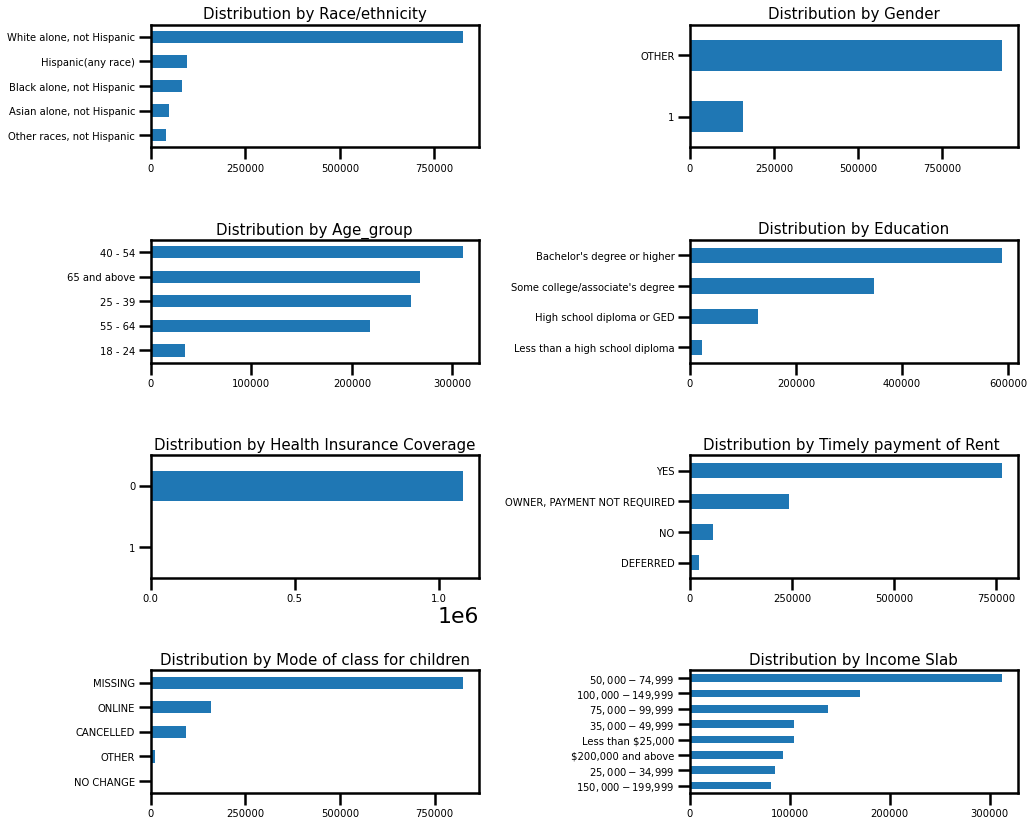

In [86]:
fig, axes = plt.subplots(figsize=(15, 12))
plt.subplot(4,2,1)
plt.title("Distribution by Race/ethnicity", fontsize=15)
df1.RACE_ETHNICITY.value_counts().sort_values().plot(kind='barh', fontsize=10)
plt.subplot(4,2,2)
plt.title("Distribution by Gender", fontsize=15)
df1.EGENDER.value_counts().sort_values().plot(kind='barh', fontsize=10)
plt.subplot(4,2,3)
plt.title("Distribution by Age_group", fontsize=15)
df1.AGE_GROUP.value_counts().sort_values().plot(kind='barh', fontsize=10)
plt.subplot(4,2,4)
plt.title("Distribution by Education", fontsize=15)
df1.EDUC.value_counts().sort_values().plot(kind='barh', fontsize=10)
plt.subplot(4,2,5)
plt.title("Distribution by Health Insurance Coverage", fontsize=15)
df1.INSURED.value_counts().sort_values().plot(kind='barh', fontsize=10)
plt.subplot(4,2,6)
plt.title("Distribution by Timely payment of Rent ", fontsize=15)
df1.RENT_PAID_ONTIME.value_counts().sort_values().plot(kind='barh', fontsize=10)
plt.subplot(4,2,7)
plt.title("Distribution by Mode of class for children", fontsize=15)
df1.CLASS_MODE.value_counts().sort_values().plot(kind='barh', fontsize=10)
plt.subplot(4,2,8)
plt.title("Distribution by Income Slab", fontsize=15)
df1.INCOME.value_counts().sort_values().plot(kind='barh', fontsize=10)
plt.tight_layout()

In [87]:
df2.head()

SCRAM  WEEK  EST_ST  EST_MSA  REGION      HWEIGHT  \
0  V130000001S12010403200123    13      48  19100.0       2  1276.886650   
1  V130000001S34010154300113    13       1      NaN       2  1195.578846   
2  V130000001S37010241600123    13       1      NaN       2  1124.648326   
3  V130000001S37010645600123    13       1      NaN       2   517.598058   
4  V130000001S70011963510113    13       1      NaN       2   432.646602   

       PWEIGHT  TBIRTH_YEAR  ABIRTH_YEAR  EGENDER  ...  PSWHYCHG1  PSWHYCHG2  \
0  1278.107099         1989            2        1  ...        -88        -88   
1  2323.078960         1988            2        2  ...        -99        -99   
2  1092.628425         1969            2        1  ...        -88        -88   
3  1005.723011         1947            2        1  ...        -88        -88   
4   840.657411         1968            2        2  ...        -88        -88   

   PSWHYCHG3  PSWHYCHG4  PSWHYCHG5  PSWHYCHG6  PSWHYCHG7  PSWHYCHG8  \
0        -88        -88        -88        -88        -88        -88   
1        -99          1          1        -99          1        -99   
2        -88        -88        -88        -88        -88        -88   
3        -88        -88        -88        -88        -88        -88   
4        -88        -88        -88        -88        -88        -88   

   PSWHYCHG9  INCOME  
0        -88       2  
1          1       6  
2        -88       7  
3        -88       6  
4        -88     -88  

[5 rows x 188 columns]

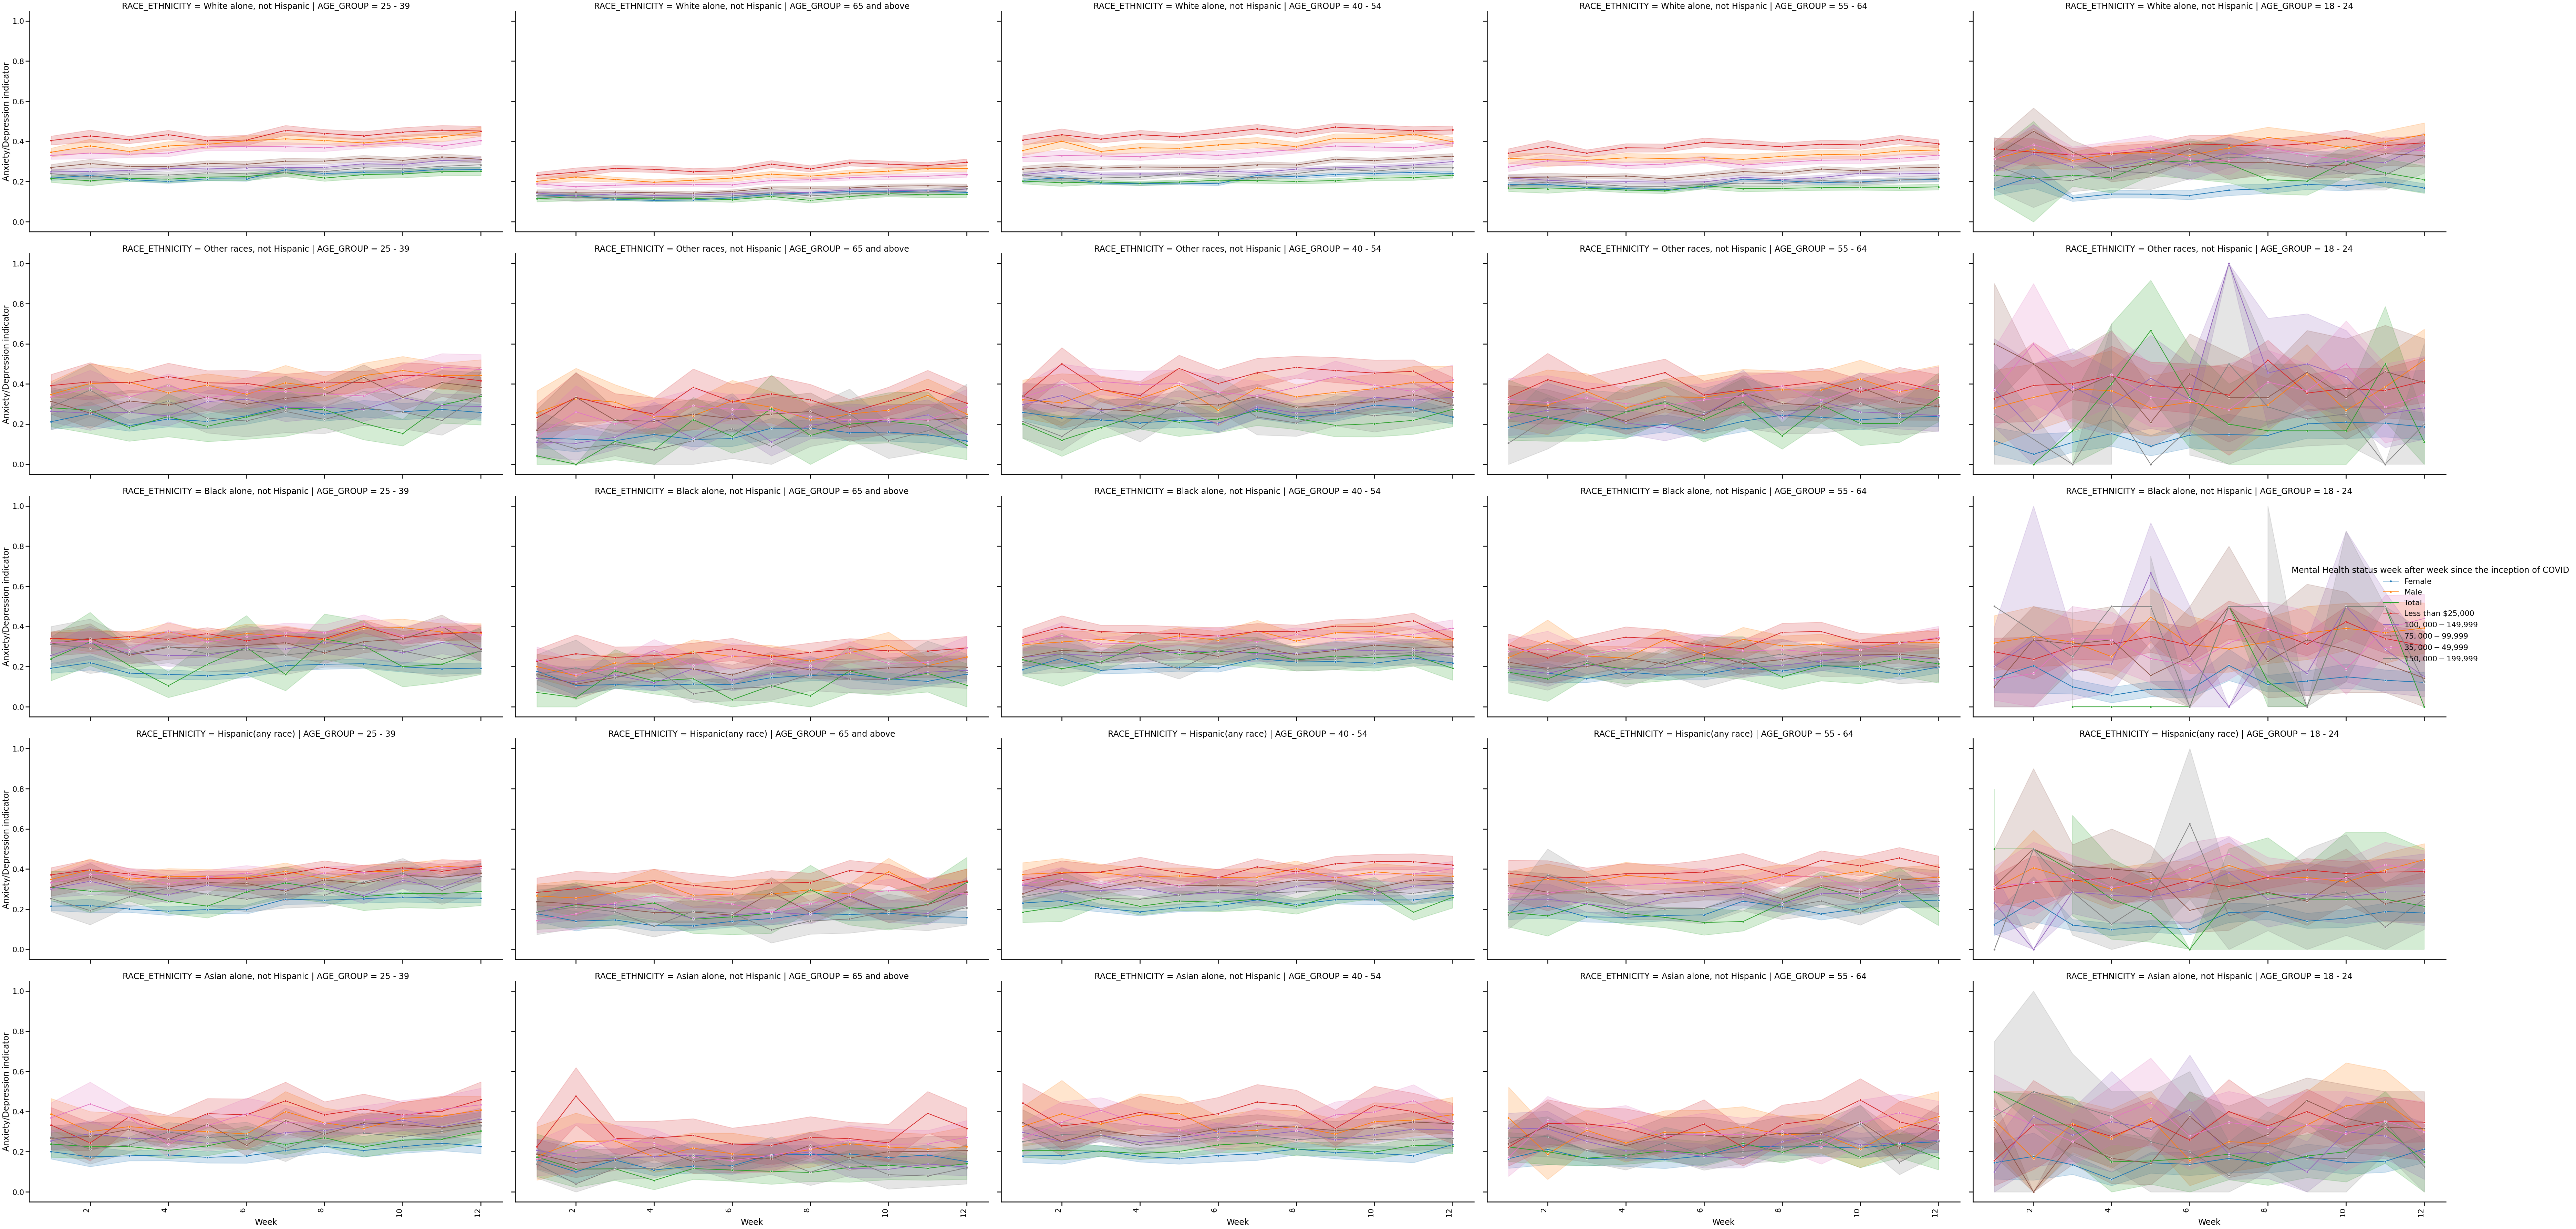

In [100]:
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":2})
#sns.set(style="ticks", color_codes=True)

graph = sns.FacetGrid(df1,hue="INCOME", 
            col="AGE_GROUP", row="RACE_ETHNICITY", height=10, aspect=2, legend_out = True)
graph = (graph.map(sns.lineplot, "WEEK", "ANXIETY_DEPRESSION", marker=".").add_legend())
graph = graph.set_axis_labels("Week", "Anxiety/Depression indicator")

# title
new_title = 'Mental Health status week after week since the inception of COVID'
graph._legend.set_title(new_title)
# replace labels
#new_labels = ['Female', 'Male','Total']
for t, l in zip(graph._legend.texts, new_labels): t.set_text(l)


graph.set_xticklabels(
    rotation=90, 
    horizontalalignment='right',
)


plt.show(graph)

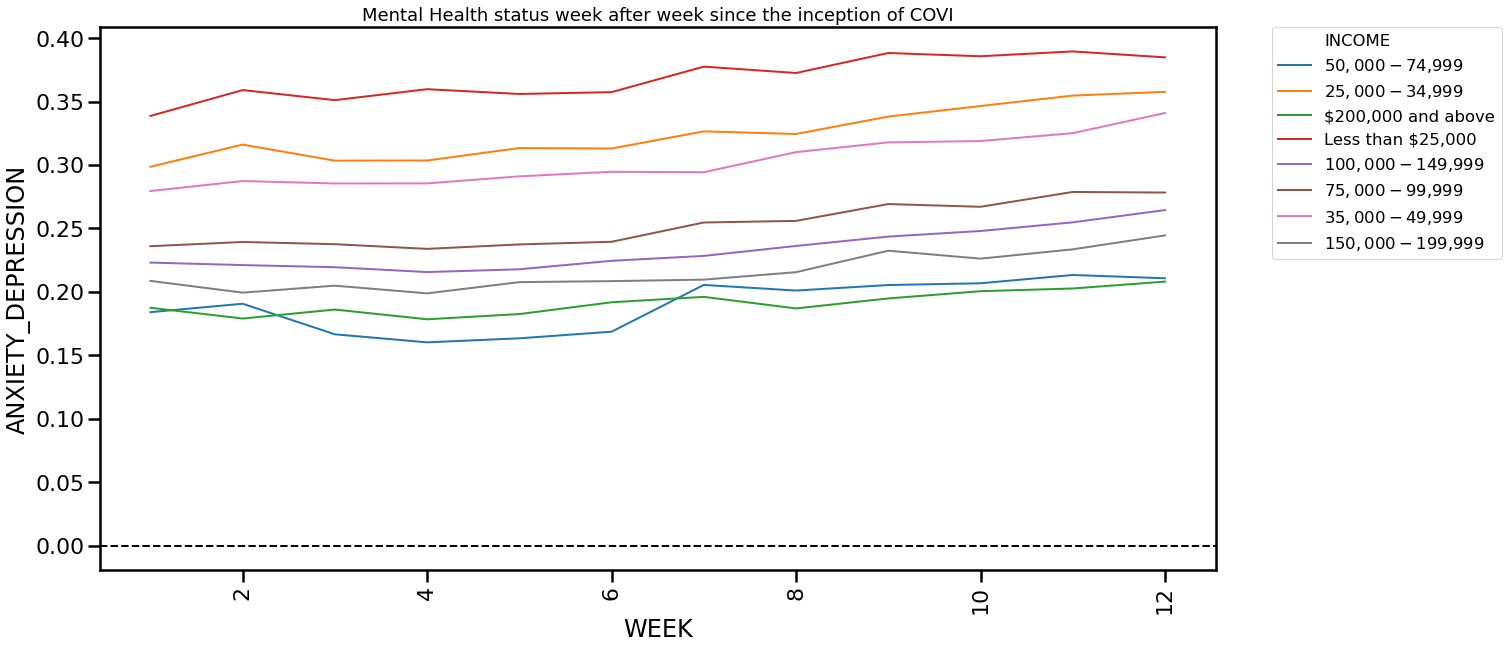

In [98]:
# We can call Matplotlib to add details to the figure
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2})

graph = sns.lineplot(x="WEEK", 
             y="ANXIETY_DEPRESSION",
             #estimator=sum,
             ci=None,
             hue="INCOME", 
             data=df1 )

graph.axhline(0, ls='--',c='black')
graph.set(xlabel='WEEK', ylabel='ANXIETY_DEPRESSION',title='Mental Health status week after week since the inception of COVID')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

<p>Bias : It can be seen that white people are over represented than other races.</p>

In [101]:
df1.EGENDER.value_counts()

OTHER    929201
1        159113
Name: EGENDER, dtype: int64

In [102]:
pd.crosstab(df1.EGENDER,df1.EMPLOSSCOVID)

EMPLOSSCOVID       0       1
EGENDER                     
1             120189   38924
OTHER         804022  125179

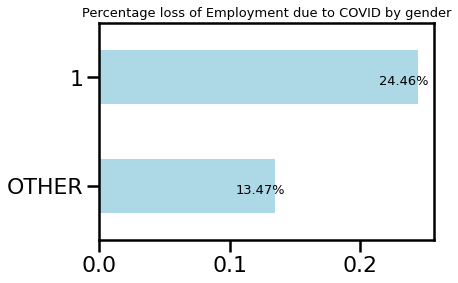

In [103]:
ax = pd.crosstab(df1.EGENDER,df1.EMPLOSSCOVID, normalize='index')[1].sort_values().plot(kind='barh',color='lightblue')

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-.03, i.get_y()+.18, \
            str(round((i.get_width())*100, 2))+'%', fontsize=13, color='black') 


plt.title("Percentage loss of Employment due to COVID by gender",fontsize=13)
ax.axes.yaxis.label.set_visible(False)

plt.show()

In [104]:
df1.RACE_ETHNICITY.value_counts()

White alone, not Hispanic    826039
Hispanic(any race)            94725
Black alone, not Hispanic     81476
Asian alone, not Hispanic     47046
Other races, not Hispanic     39028
Name: RACE_ETHNICITY, dtype: int64

In [105]:
pd.crosstab(df1.RACE_ETHNICITY,df1.EMPLOSSCOVID)

EMPLOSSCOVID                    0       1
RACE_ETHNICITY                           
Asian alone, not Hispanic   39159    7887
Black alone, not Hispanic   62511   18965
Hispanic(any race)          73331   21394
Other races, not Hispanic   31006    8022
White alone, not Hispanic  718204  107835

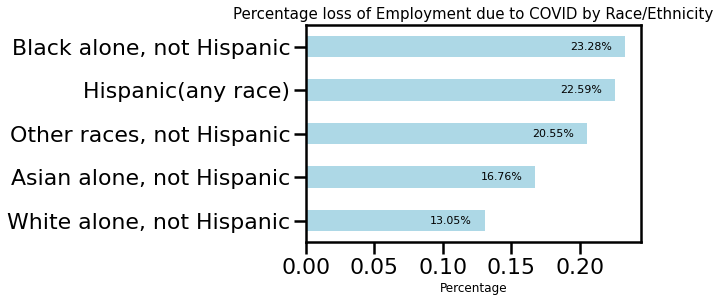

In [106]:
ax = pd.crosstab(df1.RACE_ETHNICITY,df1.EMPLOSSCOVID, normalize='index')[1].sort_values().plot(kind='barh',color='lightblue')

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-.04, i.get_y()+.18, \
            str(round((i.get_width())*100, 2))+'%', fontsize=11, color='black') 


plt.title("Percentage loss of Employment due to COVID by Race/Ethnicity", fontsize=15)
plt.xlabel("Percentage", fontsize=12)
#plt.ylabel("Race and Ethnicity")
ax.axes.yaxis.label.set_visible(False)

plt.show()

In [107]:
pd.crosstab(df1.RACE_ETHNICITY,df1.FOOD_INSUFF)

FOOD_INSUFF                     0
RACE_ETHNICITY                   
Asian alone, not Hispanic   47046
Black alone, not Hispanic   81476
Hispanic(any race)          94725
Other races, not Hispanic   39028
White alone, not Hispanic  826039

In [108]:
ax = pd.crosstab(df1.RACE_ETHNICITY,df1.FOOD_INSUFF, normalize='index')[1].sort_values().plot(kind='barh',color='lightblue')

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-.04, i.get_y()+.18, \
            str(round((i.get_width())*100, 2))+'%', fontsize=11, color='black') 


plt.title("Percentage food insufficiency due to COVID by Race/Ethnicity", fontsize=15)
plt.xlabel("Percentage", fontsize=12)
#plt.ylabel("Race and Ethnicity")
ax.axes.yaxis.label.set_visible(False)

plt.show()

KeyError: 1

In [ ]:
pd.crosstab(df1.AGE_GROUP,df1.FOOD_INSUFF)

In [ ]:
df1.head()

In [ ]:
cols_to_drop = ['ABIRTH_YEAR','EEDUC','AEDUC','AGENDER','AHHLD_NUMKID','AHHLD_NUMPER',\
          'AHISPANIC','ARACE','EST_MSA','HLTHINS1','HLTHINS2','HLTHINS3','HLTHINS4','HLTHINS5',\
          'HLTHINS6','HLTHINS7','SCRAM','FOODSUFRSN1','FOODSUFRSN2', 'FOODSUFRSN3', 'FOODSUFRSN4', 'FOODSUFRSN5',\
               'ENROLL1', 'ENROLL2','ENROLL3','TEACH1', 'TEACH2','TEACH3', 'TEACH4', 'TEACH5','HLTHINS8',\
               'COMP1', 'COMP2', 'COMP3','INTRNT1', 'INTRNT2', 'INTRNT3','WHEREFREE1', 'WHEREFREE2', 'WHEREFREE3',
       'WHEREFREE4', 'WHEREFREE5', 'WHEREFREE6', 'WHEREFREE7','TENURE','MORTLMTH','RHISPANIC','RRACE','PWEIGHT']

In [ ]:
for col in cols_to_drop:
    df1.drop(col,axis=1,inplace=True)

In [ ]:
df1.columns

In [ ]:
correlations = df1.corr()
f, ax = plt.subplots(figsize=(50,50))
sns.heatmap(correlations,annot=True);

https://www.cbpp.org/research/poverty-and-inequality/tracking-the-covid-19-recessions-effects-on-food-housing-and



In [ ]:
df1.info()

In [ ]:
df1.shape

In [ ]:
#pd.DataFrame(df1)

In [ ]:
cat_vars=['RACE_ETHINICITY','AGE_GROUP','EDUC','EGENDER',\
          'RENT_PAID_ONTIME','CLASS_MODE','FOOD_INSUFF_REASN']
for var in cat_vars:
    cat_list = pd.get_dummies(df1[var],prefix=var)
    #df1.drop(var,axis=1,inplace=True)
    pd.concat([df1,cat_list],axis=1,ignore_index=True)

In [ ]:
df1.info()

In [ ]:
plt.figure(figsize=(10,100))
for i in range(len(df1.columns)):
    plt.subplot(38, 1, i+1)
    sns.distplot(df1[df1.columns[i]], kde_kws={"bw":0.2,"color": "b", "lw": 2, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(df1.columns[i])

plt.tight_layout()

<h3> K-means clustering </h3>

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
 

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

In [ ]:
scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df1_scaled)
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1,'bx-')
plt.xlabel('# of clusters')
plt.ylabel('Within cluster sum of square')


In [ ]:
scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df1_scaled[:,:10])
    scores_1.append(kmeans.inertia_)

    plt.plot(scores_1,'bx-')
    plt.xlabel('# of clusters')
    plt.ylabel('Within cluster sum of squares')

<h3> Apply K-means method </h3>

In [ ]:
kmeans = KMeans(4)
kmeans.fit(df1_scaled)
labels = kmeans.labels_ # labels associated with each data point
# index of the cluster centroid that is closest to x(i)

In [ ]:
kmeans.cluster_centers_.shape # centroid for clusters = mu_c(i)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df1.columns])
cluster_centers

In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df1.columns])
cluster_centers

In [ ]:
# concatenate the clusters labels to our original dataframe
df1_cluster = pd.concat([df1, pd.DataFrame({'CLUSTER':labels})], axis = 1)
df1_cluster.head()

In [ ]:
# Plot the histogram of various clusters

for i in df1.columns:
    plt.figure(figsize = (35, 5))
    for j in range(4):
        plt.subplot(1,4,j+1)
        cluster = df1_cluster[df1_cluster['CLUSTER'] == j]
        ax= cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))
    
    #ax.figure.savefig('C:/Users/Lakshmi/Desktop/UW DataScience application/558 ML/Coursera ML/PCA/Kmeans-' + str(i) + '.jpg')
    
plt.show()

<h3> APPLY PRINCIPAL COMPONENT ANALYSIS </h3>

In [ ]:
X = df1_scaled.T
C = np.cov(X,bias=True) # C = empirical covariance matrix

eigenValues, eigenVectors = np.linalg.eig(C)
idx = eigenValues.argsort()[::-1] 
# sort eigen values in desc order and get their indices
print()
p=1 # number of PCs
sum_p_eigenvalues =0
sum_d_eigenvalues =np.sum(eigenValues[idx])
while sum_p_eigenvalues/sum_d_eigenvalues < 0.99:
    for j in idx[:p]:
        sum_p_eigenvalues+=eigenValues[j]
    p += 1

print("required # of PCs",p-1) # bcoz p is already incremented by 1

In [ ]:
#df1.profile_report(title='phase 1 data report')

In [ ]:
plt.scatter(X[0, :], X[1, :], c=labels)
plt.xlabel('First dimension score')
plt.ylabel('Second dimension score')
plt.title("Original dimension scores")
plt.show()

In [ ]:
# Obtain the principal components 
pca=PCA(n_components=4)
pca.fit(df1_scaled)

In [ ]:
print('****First Eigen value***')
print(pca.explained_variance_[0])
print('*******First principal component*****')
print(pca.components_[0])
print()
print('****Second Eigen value***')
print(pca.explained_variance_[1])
print('*******Second principal component:*****')
print(pca.components_[1])
print()
print('****Third Eigen value***')
print(pca.explained_variance_[2])
print('*******Third principal component:*****')
print(pca.components_[2])
print()
print('****Fourth Eigen value***')
print(pca.explained_variance_[3])
print('*******Fourth principal component:*****')
print(pca.components_[3])

In [ ]:
# Create a dataframe with the 4 components
sklearn_scores  = pca.transform(df1_scaled)


plt.scatter(sklearn_scores [:, 0], sklearn_scores [:, 1], c=labels)
plt.xlabel('First principal component score')
plt.ylabel('Second principal component score')
plt.title("PC scores using Skicit learn")
plt.show()


pca_sklearn_scores = pd.DataFrame(data = sklearn_scores, columns =['pca1','pca2','pca3','pca4'])
pca_sklearn_scores.head()

In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_sklearn_scores,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df

In [ ]:
plt.figure(figsize=(10,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2})

ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink'])
#ax.figure.savefig('C:/Users/Lakshmi/Desktop/UW DataScience application/558 ML/Coursera ML/PCA/PCA.jpg');

In [ ]:
"""
pd.crosstab(df1.EGENDER,df1.EMPLOSSCOVID, normalize='index').plot(kind='barh',stacked=True)
plt.title("Loss of Employment by Gender")
plt.xlabel("Count")
plt.ylabel("Gender")

L  = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  
L.get_texts()[0].set_text('No Employement loss due to covid')
L.get_texts()[1].set_text('Employement loss due to covid')  

plt.show()

""";
